In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [41]:
# Environment setup
import sklearn
import tensorflow as tf

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#import Keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten,  MaxPooling2D, Conv2D

## 1. Data preparation

training data set

In [42]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [43]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
data.shape

(42000, 785)

In [45]:
X_train = (data.iloc[:,1:].values).astype('float32') #this is pixels data
#.iloc[:, 1:] selects all rows (denoted by :) 
#and all columns from the second column to the end (denoted by 1:)
y_train = data.iloc[:,0].values.astype('int32')

In [46]:
X_train.shape

(42000, 784)

In [47]:
#X_train.head() //now it is not a dataframe
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
y_train.shape

(42000,)

In [49]:
X_train.dtype

dtype('float32')

In [50]:
#Each pixel intensity is represented as a byte (0 to 255)
#Let's split the full training set into a validation set and a (smaller) training set
X_train /= 255

In [51]:
# I need to reshape it because I need to show its image
X_train = X_train.reshape(42000,28,28,1)

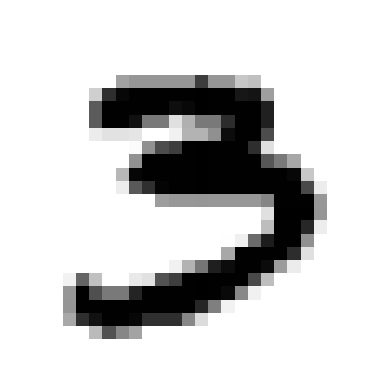

In [52]:
plt.imshow(X_train[253], cmap="binary")
plt.axis('off')
plt.show()

In [53]:
y_train[253]

3

In [54]:
#split to training and validation data set (I need 5000 validation data set )
X_training = X_train[5000:]
y_training = y_train[5000:]
X_valid = X_train[:5000]
y_valid = y_train[:5000]

testing data set

In [55]:
data_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [56]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
data_test.shape

(28000, 784)

In [58]:
X_test = data_test.values.astype('float32')
X_test /= 255

In [59]:
X_test.shape

(28000, 784)

In [60]:
X_test = X_test.reshape(28000,28,28,1)

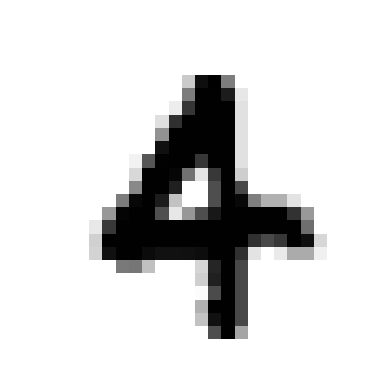

In [61]:
plt.imshow(X_test[112], cmap="binary")
plt.axis('off')
plt.show()

turn label into the array (like one-hot encoding)

In [62]:
y_training

array([8, 7, 2, ..., 7, 6, 9], dtype=int32)

In [63]:
n_classes = 10
y_training = tf.keras.utils.to_categorical(y_training, n_classes)
y_valid = tf.keras.utils.to_categorical(y_valid, n_classes)

In [64]:
y_training

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## 2. Model creation by using Sequential

In [65]:
model = Sequential([
			Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
			Conv2D(64, kernel_size=(3,3), activation='relu'),
			MaxPooling2D(pool_size=(2,2)),
			Dropout(0.25),
			Flatten(),
			Dense(128, activation='relu'),
			Dropout(0.5),
			Dense(n_classes, activation='softmax')
		])

The code creates a sequential model in Keras. The model consists of the following layers:

- Conv2D layers: These layers perform 2D convolutions on the input data. The first Conv2D layer has 32 filters with a kernel size of 3x3, and the second Conv2D layer has 64 filters with a kernel size of 3x3.
- MaxPooling2D layers: These layers perform max pooling on the output of the Conv2D layers. The MaxPooling2D layer with a pool size of 2x2 reduces the size of the output by half.
- Dropout layers: These layers randomly drop out some of the output neurons during training. This helps to prevent overfitting.
- Flatten layer: This layer flattens the output of the Conv2D and MaxPooling2D layers into a 1D vector.
- Dense layers: These layers are fully connected layers. The first Dense layer has 128 neurons, and the second Dense layer has n_classes neurons, where n_classes is the number of classes in the classification problem.

In [66]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

The code compiles the model. The compile() method takes three arguments:

- loss: The loss function to use during training. The loss function measures the difference between the predicted outputs of the model and the ground truth labels.
  - categorical_crossentropy. This loss function is commonly used for multi-class classification problems
- optimizer: The optimizer to use during training. The optimizer updates the weights of the model in order to minimize the loss function.
  - Adam is a popular optimizer that is known to be effective for training deep learning models
- metrics: The metrics to use to evaluate the model during training and evaluation. The metrics measure the performance of the model on the training and evaluation datasets.

## 3. Training data

In [68]:
training_data = model.fit(X_training, y_training, batch_size=150, epochs=5, verbose=1,
          validation_data=(X_valid,y_valid))

Epoch 1/5
247/247 [==============================] - 61s 241ms/step - loss: 0.3286 - accuracy: 0.8994 - val_loss: 0.0829 - val_accuracy: 0.9734
Epoch 2/5
247/247 [==============================] - 59s 241ms/step - loss: 0.1015 - accuracy: 0.9687 - val_loss: 0.0575 - val_accuracy: 0.9830
Epoch 3/5
247/247 [==============================] - 59s 239ms/step - loss: 0.0760 - accuracy: 0.9764 - val_loss: 0.0440 - val_accuracy: 0.9864
Epoch 4/5
247/247 [==============================] - 59s 237ms/step - loss: 0.0626 - accuracy: 0.9806 - val_loss: 0.0374 - val_accuracy: 0.9860
Epoch 5/5
247/247 [==============================] - 59s 238ms/step - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.0377 - val_accuracy: 0.9886


In [69]:
training_data.params

{'verbose': 1, 'epochs': 5, 'steps': 247}

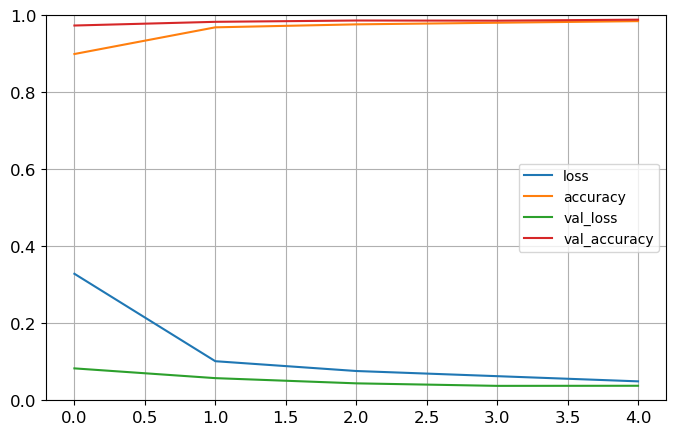

In [71]:
import pandas as pd

pd.DataFrame(training_data.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Try with validation

In [72]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 2s 14ms/step - loss: 0.0377 - accuracy: 0.9886


[0.03769787773489952, 0.9886000156402588]

In [73]:
X_new = X_valid[:3]
y_proba = model.predict(X_new)
y_proba.round()

1/1 [==============================] - 0s 139ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [74]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 25ms/step


array([1, 0, 1])

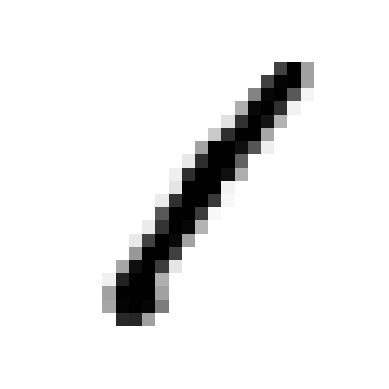

In [75]:
plt.imshow(X_new[0], cmap="binary")
plt.axis('off')
plt.show()

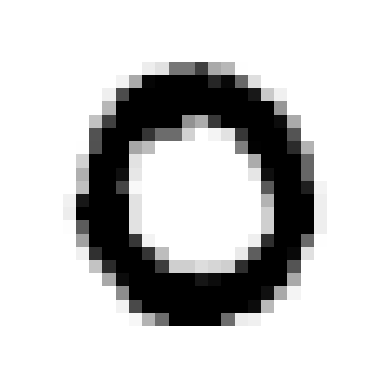

In [76]:
plt.imshow(X_new[1], cmap="binary")
plt.axis('off')
plt.show()

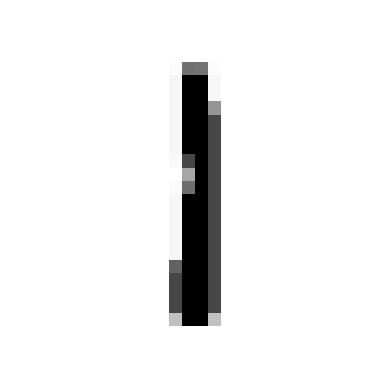

In [77]:
plt.imshow(X_new[2], cmap="binary")
plt.axis('off')
plt.show()

## Submitting Predictions to Kaggle

In [80]:
y_submission = np.argmax(model.predict(X_test), axis=-1)

875/875 [==============================] - 12s 13ms/step


In [81]:
y_submission

array([2, 0, 9, ..., 3, 9, 2])

try imaging

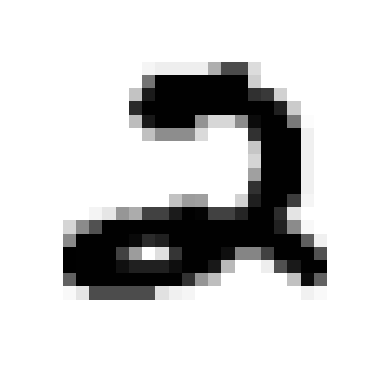

In [82]:
plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()

In [83]:
y_submission[0]

2

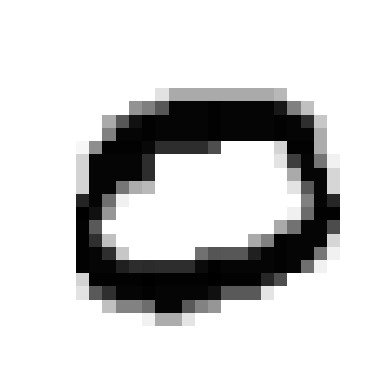

In [84]:
plt.imshow(X_test[1], cmap="binary")
plt.axis('off')
plt.show()

In [85]:
y_submission[1]

0

In [86]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(y_submission)+1)),
                         "Label": y_submission})

In [87]:
submissions

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [88]:
submissions.to_csv("/kaggle/working/submission.csv", index=False, header=True)